In [20]:
#!/usr/bin/env python3

import subprocess
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
from vosk import Model, KaldiRecognizer, SetLogLevel

In [29]:


SAMPLE_RATE = 16000

SetLogLevel(0)

model = Model(lang="en-us")
rec = KaldiRecognizer(model, SAMPLE_RATE)
rec.SetWords(True)

with subprocess.Popen(["ffmpeg", "-loglevel", "quiet", "-i",
                            r"C:/Users/stell/OneDrive/desktop/CANS_LAB/Female_Single_Speakers/F01_single105.wav",
                            "-ar", str(SAMPLE_RATE) , "-ac", "1", "-f", "s16le", "-"],
                            stdout=subprocess.PIPE) as process:

    while True:
        data = process.stdout.read(4000)
        if len(data) == 0:
            break
        rec.AcceptWaveform(data)
            #print(rec.Result())
            #continue
        # else:
        #     #print(rec.PartialResult())
        #     continue

    #print(rec.FinalResult())
    
    # Get final result
result = json.loads(rec.FinalResult())
#print (result)
# Print word-level timestamps

#See if there are any misalignment
#print(len(result["result"]))


word_data = []
if "result" in result:
    for word in result["result"]:
        #print(len(result["result"]))
        print(f"{word['start']:.3f}\t{word['end']:.3f}\t{word['word']}")
        word_data.append({
                'Vosk_word': word['word'],
                'Vosk_Start': word['start'],
                'Vosk_End': word['end']
                })

# Creating dataframes
df_word_Vosk = pd.DataFrame(word_data)

df_word_Vosk.to_csv('Vosk_timings.csv', index = False, float_format="%.7f")


#if not os.path.exists(output_path):
    # Read MFA CSV
df_Vosk = pd.read_csv('Vosk_timings.csv')
df_Vosk_select = df_Vosk.iloc[1:60]

#Read all CSV for comparison
df_total = pd.read_csv(r"C:\Users\stell\OneDrive\Desktop\CANS_LAB\COLOR_compare_timings.csv")[["text", "tier", "tmin", "tmax"]]
df_total_select = df_total.iloc[2:61]

combined_timings = pd.concat([df_total_select, df_Vosk_select], axis=1)

combined_timings.to_csv('vosk vs OG.csv', index=False, float_format="%.7f")
#else:
 #   print("Output file already exists. Skipping concatenation.")
        

0.030	0.139	in
0.139	0.270	the
0.270	0.720	bosom
0.720	0.870	of
0.870	1.080	one
1.080	1.170	of
1.170	1.470	those
1.470	2.160	spacious
2.160	2.850	coves
2.850	3.120	which
3.120	3.240	and
3.560	3.690	the
3.690	4.200	eastern
4.200	4.590	shore
4.590	4.710	of
4.710	4.830	the
4.830	5.460	hudson
5.910	6.090	at
6.090	6.330	that
6.330	6.720	broad
6.720	7.470	expansion
7.470	7.590	of
7.590	7.680	the
7.680	8.190	river
8.520	9.300	denominated
9.300	9.450	by
9.450	9.630	the
9.630	10.020	ancient
10.020	10.350	dutch
10.350	11.070	navigators
11.070	11.190	the
11.190	11.640	tappan
11.640	12.150	zee
12.540	12.690	there
12.690	13.080	lies
13.080	13.140	a
13.140	13.650	small
13.650	14.160	market
14.160	14.640	town
14.700	14.910	or
14.910	15.330	rural
15.330	15.840	port
16.170	16.380	which
16.380	16.560	by
16.560	16.890	some
16.890	17.040	is
17.040	17.430	called
17.430	18.360	greensburg
18.630	18.840	but
18.840	19.050	which
19.050	19.170	is
19.170	19.410	more
19.410	20.160	generally
20.160	20.370	and
20.37

Text(0, 0.5, 'Frequency')

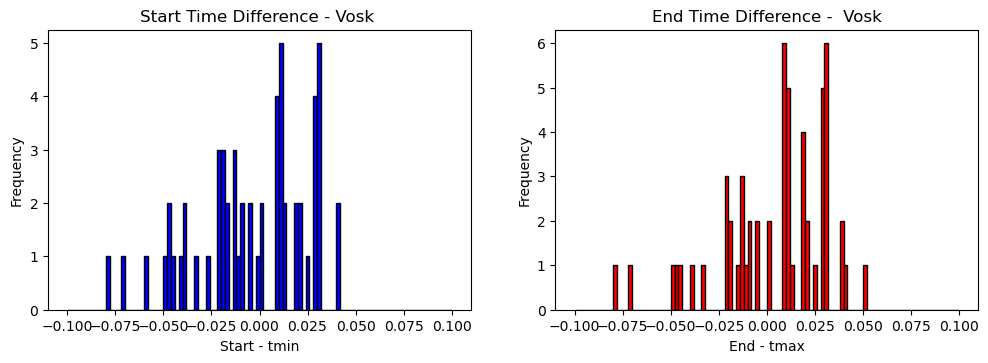

In [31]:
combined_df = pd.read_csv("vosk vs OG.csv")

plt.figure(figsize=(12, 8))

# Histogram of Start difference
plt.subplot(2, 2, 1)
plt.hist(combined_df["Vosk_Start"] - combined_df["tmin"], bins = 100, color='blue', edgecolor='black', range=(-0.1, 0.1))
plt.title("Start Time Difference - Vosk ")
plt.xlabel("Start - tmin")
plt.ylabel("Frequency")

# Histogram of End difference
plt.subplot(2, 2, 2)
plt.hist(combined_df["Vosk_End"] - combined_df["tmax"], bins = 100, color='red', edgecolor='black', range=(-0.1, 0.1))
plt.title("End Time Difference -  Vosk")
plt.xlabel("End - tmax")
plt.ylabel("Frequency")